## Working with EEG data
We learned how to load basic information about CML experiments and experimental events. Next, we're going to load EEG/iEEG data that correspond to those events.

### What is EEG?
Before we get into the weeds, let's briefly review exactly what EEG is, how we collect it, and what we can learn from it. Much of this material is sourced from this paper by Pesaran, et al. (2018): https://www.nature.com/articles/s41593-018-0171-8

The fundamental signal detected by any electrical brain sensor is the **field potential**, or the change in extracellular voltage induced by aggregated electrical currents across a population of neurons. In other words, as neurons communicate with one another, ions flow across channels at synapses (and along the axon during action potentials). These ionic flows set up a difference in the electrical potential between two areas of brain tissue, which is detected by a sensor placed within the brain (iEEG/sEEG), on the cortical surface (ECoG), or on the scalp (EEG). 

Typically, we refer to the **local field potential (LFP)** when we're talking about field potentials detected by electrodes inserted directly into brain tissue -- such as stereo-EEG depth electrodes -- and **electrocorticography (ECoG)** when we're talking about field potentials detected by electrodes that sit on the surface of the brain. Often, you'll find both of these types of signals in one patient. 

<br>
<center>
<img src="https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41593-018-0171-8/MediaObjects/41593_2018_171_Fig1_HTML.jpg" width=400>
</center>

The exact neural source of a field potential is not always clear, and it can depend on the placement of an electrode relative to the underlying geometry of neurons and their component parts. For example, a scalp EEG electrode is detecting a field potential generated by the activity of millions of cells in a broad area of the brain near the electrode -- and filtered through the skull and scalp -- while a depth electrode placed in the hippocampus directly records the activity from only a few thousand cells.

The synchronized activity of many cells near an electrode gives rise to an **oscillation**, or a rhythmic fluctuation of the field potential at a particular frequency. The presence of an oscillation is thought to indicate the coordinated neural activity of (or inputs to) a given region, but their origins are multifactorial. Oscillations themselves can affect the firing of neurons, making them an important phenomenon to study in the context of cognition and behavior. We'll talk more about oscillations tomorrow. 

### Invasive Monitoring for Epilepsy Surgery

<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/iEEG_methods-01.jpg?raw=true" width=700>
</center>

Why do we collect EEG? Noninvasive methods, such as scalp EEG and MEG, are safe to use on healthy people. But invasive recordings such as stereo-EEG and ECoG must be justified with a clinical need. Patients with medication-resistant epilepsy come to the hospital for surgical treatment of their epilepsy, in which epileptogenic brain tissue is ablated or removed. But in order to precisely localize this tissue, patients undergo monitoring during which EEG signals are recorded intracranially for several days or weeks, until sufficient seizure events are documented. 

* **(A)** shows a craniotomy, during which a part of the skull is removed so that a grid or strip electrode can be placed on the cortical surface. This method was more common several years ago, and comprises the bulk of early RAM and pre-RAM datasets. 
* **(B)** is a CT-MRI fusion depecting a depth electrode placed in the MTL. So-called "stereo-EEG" depth electrodes are far less invasive, since even a tiny hole in the skull is sufficient to slip one of these wires through. Nowadays, many patients are exclusively stereo-EEG. 

### Load the data (as was done above)

In [1]:
import pandas as pd
from CMLLoad import CMLLoad
# Remember to update this to where your CMLExamples data is located.
load = CMLLoad('./CMLExamples')

# We load the dataframe for all sessions.
df = load.Index()

# Specify which subject and experiment we want
sub = 'R1111M'
exp = 'FR1'

# Select the dataframes for our subject and experiment.
df_select = df[(df['subject']==sub) & (df['experiment']==exp)]
# Pick the first session
df_sess = df_select.iloc[0]

# For first session...
evs = load.Load(df_sess, 'events')
word_evs = evs[evs['type']=='WORD']

#### Load subject electrodes

In [2]:
channels = load.Load(df_sess, 'channels')  #loading all bipolar pairs, but use 'contacts' for non-rereferenced data
channels[:10]

,contact_1,contact_2,label,id,is_explicit,is_stim_only,type_1,type_2,avg.region,avg.x,...,wb.x,wb.y,wb.z,stein.region,stein.x,stein.y,stein.z,mni.x,mni.y,mni.z
0,1,9,LPOG1-LPOG9,lpog.1-lpog.9,False,False,G,G,middletemporal,-65.295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.28000,-24.47930,-25.704682
1,1,2,LPOG1-LPOG2,lpog.1-lpog.2,False,False,G,G,middletemporal,-66.140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.32435,-20.27770,-20.704405
2,2,10,LPOG2-LPOG10,lpog.2-lpog.10,False,False,G,G,middletemporal,-67.055,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-68.17790,-24.27370,-16.147723
3,2,3,LPOG2-LPOG3,lpog.2-lpog.3,False,False,G,G,middletemporal,-66.335,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-67.85235,-18.97405,-11.785856
4,3,4,LPOG3-LPOG4,lpog.3-lpog.4,False,False,G,G,superiortemporal,-63.665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.81390,-16.24680,-0.170758
5,3,11,LPOG3-LPOG11,lpog.3-lpog.11,False,False,G,G,superiortemporal,-66.210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.49205,-22.66135,-6.117569
6,4,5,LPOG4-LPOG5,lpog.4-lpog.5,False,False,G,G,postcentral,-60.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.88315,-14.75105,11.296800
7,4,12,LPOG4-LPOG12,lpog.4-lpog.12,False,False,G,G,superiortemporal,-63.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-64.42160,-20.69280,4.779624
8,5,6,LPOG5-LPOG6,lpog.5-lpog.6,False,False,G,G,postcentral,-58.595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.15850,-12.24788,20.745970
9,5,13,LPOG5-LPOG13,lpog.5-lpog.13,False,False,G,G,supramarginal,-61.135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.59895,-18.82055,16.364520


Some key attributes you may need in your analyses include: 
* label: The clinical label for each electrode, as determined in the hospital
* ind.region: The anatomical region using the Desikan-Killiany atlas. 
* ind.x/y/z: Electrode coordinates in individual FreeSurfer space. 
* avg.x/y/z: Electrode coordintes in average FreeSurfer space. 
* tal.x/y/z or mni.x/y/z: Coordinates in Talairach or MNI space. 
* stein.region or das.region: Manually-confirmed labels for MTL subfields (mostly). Talk to me offline about getting these labels for recent subjects.

(The x axis points to the right, the y axis to the front, and the z axis up.)

* For a full description of fields in 'pairs' or 'contacts' structures, see: https://github.com/pennmem/neurorad_pipeline/blob/master/RELEASE_NOTES.md
* For more information on brain coordinate systems, see: http://www.fieldtriptoolbox.org/faq/how_are_the_different_head_and_mri_coordinate_systems_defined/

**Exercise: Plot the distributions of 'ind' x, y, and z values for all of R1111Ms electrodes.**

**Exercise: How many electrodes does R1111M have placed in the temporal cortex? How many on the left and how many on the right?**

### Load EEG

Loading EEG is pretty simple -- use your reader's **'load_eeg'** method, and pass it an events dataframe, when you want to start/stop the EEG clip (in ms), and the electrodes you want. Use a **'pairs'** dataframe for bipolar data (see below) or a **'contacts'** dataframe for unrereferenced data.

* Note that events and electrodes dataframes must be passed as slices, not individual rows. So index them like 'pairs[0:1]' or 'pairs.loc[0:1]' for the first electrode pair, not 'pairs.loc[0]'. Same goes for events!
* Unrereferenced data is **not available** for subjects collected on the newer RAM ENS system. The ENS inherently records in bipolar fashion (to mitigate stimulation artifact). Passing a 'contacts' structure should yield an error if this is the case. 

In [10]:
load.LoadEEG?

Signature: load.LoadEEG(df_row, ev_start=0, ev_len=None, buf=None, strict=None)
Docstring:
df_row: A selected DataFrame row.
ev_start: The relative offset for starting each event in milliseconds.
ev_len: The length to make of each event in milliseconds.
  dividing the eeg into time around event boundaries.
buf: Extra time in millieconds to add to both ends of each event.
strict: A bool enabling ArithmeticError for nans.
Returns a 3 element tuple of:
  (numpy array [events, channels, time], samplingrate, channels).
File:      ~/Lab Training Code/CMLWorkshop/CMLLoad.py
Type:      method


In [11]:
# Grab the EEG data

eeg, samplingrate, channels = load.LoadEEG(df_sess, ev_start=0, ev_len=1600)

In [12]:
# EEG data is in the numpy array eeg
print(list(word_evs.index))
# EEG for the first five events from the first seven electrodes

[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 560, 561, 562

In [13]:
# The output from this mode is a numpy array of [events, electrodes, samples]
print(eeg.shape)

# Show the EEG data
print(eeg)


(765, 141, 800)
[[[  6153.   6163.   6173. ...   6080.   6074.   6067.]
  [  7068.   7064.   7064. ...   7143.   7134.   7127.]
  [ -4876.  -4871.  -4869. ...  -5025.  -5020.  -5012.]
  ...
  [  7825.   7827.   7828. ...   7780.   7780.   7776.]
  [-10137. -10133. -10133. ... -10249. -10249. -10246.]
  [ -1432.  -1435.  -1437. ...  -1436.  -1432.  -1428.]]

 [[  6172.   6178.   6180. ...   6037.   6038.   6032.]
  [  7071.   7089.   7095. ...   6892.   6887.   6877.]
  [ -4948.  -4964.  -4969. ...  -4818.  -4809.  -4797.]
  ...
  [  7734.   7732.   7728. ...   7763.   7763.   7767.]
  [-10265. -10265. -10265. ... -10234. -10233. -10233.]
  [ -1429.  -1429.  -1433. ...  -1394.  -1389.  -1388.]]

 [[  5855.   5860.   5871. ...   6159.   6153.   6153.]
  [  7030.   7031.   7037. ...   7151.   7145.   7137.]
  [ -4958.  -4961.  -4958. ...  -4958.  -4958.  -4957.]
  ...
  [  7693.   7699.   7712. ...   7770.   7769.   7773.]
  [-10164. -10166. -10170. ... -10205. -10210. -10221.]
  [ -1413.

In [14]:
# We can immediately filter by word events and channels,
# here selecting channels 0 through 4 (up to but not including the 5):

eeg_filt = eeg[word_evs.index, 0:5]

print(eeg_filt.shape)
print(eeg_filt)

(288, 5, 800)
[[[ 6193.  6194.  6202. ...  6306.  6299.  6296.]
  [ 7132.  7128.  7120. ...  7166.  7170.  7174.]
  [-4988. -4987. -4989. ... -4948. -4952. -4967.]
  [ 3814.  3817.  3821. ...  3903.  3889.  3878.]
  [-2088. -2088. -2087. ... -2487. -2492. -2495.]]

 [[ 6255.  6251.  6257. ...  5965.  5959.  5950.]
  [ 7177.  7165.  7165. ...  7013.  7015.  7018.]
  [-4963. -4962. -4965. ... -5019. -5025. -5034.]
  [ 3777.  3777.  3769. ...  3860.  3855.  3856.]
  [-2045. -2045. -2053. ... -2205. -2209. -2215.]]

 [[ 6011.  5995.  5983. ...  6338.  6340.  6344.]
  [ 7025.  7006.  6993. ...  7096.  7113.  7135.]
  [-4905. -4902. -4904. ... -4886. -4888. -4895.]
  [ 3784.  3785.  3782. ...  3760.  3762.  3758.]
  [-2196. -2199. -2206. ... -2086. -2109. -2124.]]

 ...

 [[ 6658.  6642.  6631. ...  6269.  6256.  6248.]
  [ 7302.  7287.  7286. ...  7322.  7308.  7300.]
  [-4897. -4886. -4887. ... -4828. -4818. -4809.]
  [ 3821.  3825.  3820. ...  4056.  4055.  4050.]
  [-2071. -2079. -2089. 

In [15]:
# You might instead want the EEG in a PTSA or MNE format.
# These two libraries will be very useful for later analyses.
eeg_ptsa = load.LoadPTSA(df_sess, ev_start=0, ev_len=1600)
eeg_mne = load.LoadMNE(df_sess, ev_start=0, ev_len=1600)

/home1/jrudoler/anaconda3/envs/cml37/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


765 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


In [16]:
# We can select out word events and the first five channels using PTSA, just like the numpy array
eeg_ptsa_filt = eeg_ptsa[word_evs.index, channels.index[0:5]]

# Lets look at the resulting data
print(eeg_ptsa_filt)

<xarray.TimeSeries (event: 288, channel: 5, time: 800)>
array([[[ 6193.,  6194., ...,  6299.,  6296.],
        [ 7132.,  7128., ...,  7170.,  7174.],
        ...,
        [ 3814.,  3817., ...,  3889.,  3878.],
        [-2088., -2088., ..., -2492., -2495.]],

       [[ 6255.,  6251., ...,  5959.,  5950.],
        [ 7177.,  7165., ...,  7015.,  7018.],
        ...,
        [ 3777.,  3777., ...,  3855.,  3856.],
        [-2045., -2045., ..., -2209., -2215.]],

       ...,

       [[ 6055.,  6047., ...,  6095.,  6084.],
        [ 7137.,  7136., ...,  6982.,  6979.],
        ...,
        [ 3773.,  3771., ...,  3768.,  3762.],
        [-2320., -2324., ..., -2258., -2259.]],

       [[ 6101.,  6097., ...,  6164.,  6170.],
        [ 7002.,  6997., ...,  7042.,  7037.],
        ...,
        [ 3757.,  3750., ...,  3897.,  3921.],
        [-2333., -2330., ..., -2300., -2307.]]])
Coordinates:
  * channel     (channel) <U13 'LPOG1-LPOG9' 'LPOG1-LPOG2' ... 'LPOG3-LPOG4'
  * time        (time) float6

In [17]:
# We can also filter the eeg_mne for word events.
eeg_mne_filt = eeg_mne[word_evs.index]

# Then we can filter the eeg_mne_filt again for channels.
eeg_mne_filt = eeg_mne_filt.pick_channels(eeg_mne.ch_names[0:5])

# Lets observe the remaining dimensions
print(eeg_mne_filt.get_data().shape)

# And look at the numpy array of the remaining data
print(eeg_mne_filt.get_data())


(288, 5, 800)
[[[ 6193.  6194.  6202. ...  6306.  6299.  6296.]
  [ 7132.  7128.  7120. ...  7166.  7170.  7174.]
  [-4988. -4987. -4989. ... -4948. -4952. -4967.]
  [ 3814.  3817.  3821. ...  3903.  3889.  3878.]
  [-2088. -2088. -2087. ... -2487. -2492. -2495.]]

 [[ 6255.  6251.  6257. ...  5965.  5959.  5950.]
  [ 7177.  7165.  7165. ...  7013.  7015.  7018.]
  [-4963. -4962. -4965. ... -5019. -5025. -5034.]
  [ 3777.  3777.  3769. ...  3860.  3855.  3856.]
  [-2045. -2045. -2053. ... -2205. -2209. -2215.]]

 [[ 6011.  5995.  5983. ...  6338.  6340.  6344.]
  [ 7025.  7006.  6993. ...  7096.  7113.  7135.]
  [-4905. -4902. -4904. ... -4886. -4888. -4895.]
  [ 3784.  3785.  3782. ...  3760.  3762.  3758.]
  [-2196. -2199. -2206. ... -2086. -2109. -2124.]]

 ...

 [[ 6658.  6642.  6631. ...  6269.  6256.  6248.]
  [ 7302.  7287.  7286. ...  7322.  7308.  7300.]
  [-4897. -4886. -4887. ... -4828. -4818. -4809.]
  [ 3821.  3825.  3820. ...  4056.  4055.  4050.]
  [-2071. -2079. -2089. 

Text(0.5, 1.0, 'Sample EEG trace')

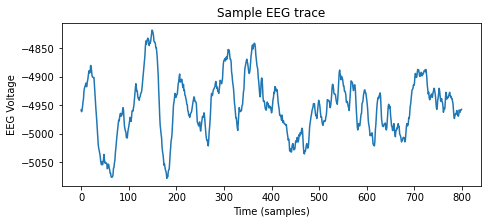

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot an example EEG trace
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(eeg[2, 2, :])
plt.ylabel('EEG Voltage'); plt.xlabel('Time (samples)')
plt.title('Sample EEG trace')

This is the fundamental unit of all of the analyses you'll do in the lab -- the EEG timeseries! Whether from scalp or intracranial, our core interest is understanding the properties of these timeseries relative to interesting behavioral or cognitive events. Typically, we understand EEG signals with **spectral decomposition**, which will be covered tomorrow.

### Referencing

Electrical potentials inherently reflect some kind of differential. In the case of EEG data, the voltage fluctuations we measure really reflect a difference between an electrode of interest and a "reference" electrode placed elsewhere (such as the mastoid or an arbitrary location in the brain). As such, noise on the reference electrode -- and other sources -- can contaminate our measurement of true neural signal in the raw data. 

To solve this, it is common to "re-reference" EEG data to mitigate sources of noise. We could have a whole discussion about different ways to re-reference data, and the advantages/disadvantages of each, but there are two common ways of re-referencing I'll mention here. 

The most common re-reference used in this lab is the **bipolar** reference, in which the signal from each channel is subtracted from its neighbor. The result is an estimate of a cleaner signal that putatively reflects activity at the midpoint of the two physical recording contacts (we sometimes call this midpoint a **virtual electrode**). The bipolar reference has several advantages: (1) it's very simple to implement, (2) it typically does a good job at removing widespread noise, and (3) it ensures that your re-referenced traces reflect activity that is very close to the original electrodes. 

(One downside is that bipolar re-referencing can actually reduce your ability to detect true neural signals, or mislocalize its origin, especially if two adjancent electrodes were detecting a common source of electrical activity.)

You may also encounter the **common average** reference, in which the average signal across all electrodes (or perhaps within a predefined anatomical region) is subtracted from each. This method is less likely to destroy local signals, and also does a good job removing widespread noise or reference noise, but can potentially contaminate originally-clean electrodes with unmitigated noise from a completely different part of the brain. 

Neither method is perfect, and there are more sophisiticated approaches out there. For the sake of this tutorial, we're going to focus on the bipolar reference. But it is often nice to try different referencing schemes in your analysis to ensure that your results don't change drastically from one to the other. 

<center>
<img src="http://www.bem.fi/book/13/fi/1303.gif">
</center>

In [24]:
# Let's examine the bipolar referencing used in the example data.
# The channels are as follows:
channels = load.Load(df_sess, 'channels')

print(channels[0:10])


   contact_1  contact_2         label              id  is_explicit  \
0          1          9   LPOG1-LPOG9   lpog.1-lpog.9        False   
1          1          2   LPOG1-LPOG2   lpog.1-lpog.2        False   
2          2         10  LPOG2-LPOG10  lpog.2-lpog.10        False   
3          2          3   LPOG2-LPOG3   lpog.2-lpog.3        False   
4          3          4   LPOG3-LPOG4   lpog.3-lpog.4        False   
5          3         11  LPOG3-LPOG11  lpog.3-lpog.11        False   
6          4          5   LPOG4-LPOG5   lpog.4-lpog.5        False   
7          4         12  LPOG4-LPOG12  lpog.4-lpog.12        False   
8          5          6   LPOG5-LPOG6   lpog.5-lpog.6        False   
9          5         13  LPOG5-LPOG13  lpog.5-lpog.13        False   

   is_stim_only type_1 type_2        avg.region   avg.x   avg.y   avg.z  \
0         False      G      G    middletemporal -65.295 -24.035 -25.980   
1         False      G      G    middletemporal -66.140 -18.330 -21.425   
2   

Compare contact_1, contact_2, and the dash separated pairs in the label column.  The bipolar referencing scheme works by subtracting contact_1 from contact_2, and recording that signal in the EEG file.  The brain regions and coordinates identified in the various columns are typically taken from the location in between the two electrodes which make up the bipolar pair.

## Check out some ERPs
To carry out an ERP analysis on the voltage data, we must 1. Load the desired events, 2. Filter to only encoding
events, 3. Get the voltage for all encoding events, 4. Z-Score the voltage, 5. Get a logical index of recall status, 6. Plot
the average subsequently recalled and subsequently forgotten voltage traces.

avg.region: cuneus


Text(0, 0.5, 'Z-scored Voltage')

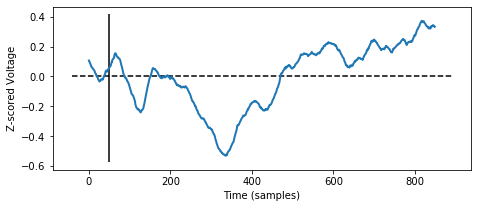

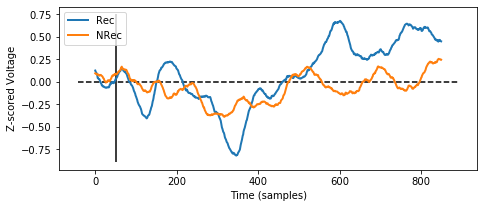

In [25]:
import numpy as np

# Load 1700ms long EEG events from 100ms before event to 1600ms after
eeg, sr, channels = load.LoadEEG(df_sess, -100, 1700)
# Select word encoding events for channel 112 (as a slice), keeping events, channels, time
# Channel 112 is in the cuneus, part of the occipital lobe.
eeg = eeg[word_evs.index, 112:113]
print('avg.region:', channels.iloc[112]['avg.region'])

# Get recalled/not recalled status
# Note, the values are 0 and 1 in the database.  It is essential to turn this into a boolean array
# so that numpy will later process it as a boolean mask, and not as indices of 0 and 1 to repeatedly
# index the eeg with.
rec_status = word_evs['recalled']==True

mu = np.mean(np.mean(eeg[:, 0, :], 1), 0)
std_ = np.std(np.mean(eeg[:, 0, :], 1), 0)

zeeg = (eeg-mu)/std_

# Plot the trace averaged across all events
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.mean(zeeg[:, 0, :], 0), linewidth=2,)
plt.vlines([0.1*sr], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.xlabel('Time (samples)'); plt.ylabel('Z-scored Voltage')

# Plot the trace for rec/nrec separately
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.mean(zeeg[rec_status, 0, :], 0), linewidth=2, label='Rec')
plt.plot(np.mean(zeeg[~rec_status, 0, :], 0), linewidth=2, label='NRec')
plt.vlines([0.1*sr], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.legend()
plt.xlabel('Time (samples)'); plt.ylabel('Z-scored Voltage')

**Exercise: Plot the ERP in a 2-second span surrounding the recall of each word event for a lateral occipital electrode from the first FR1 session conducted by R1383J. Does our occipital electrode show an effect? What about elsewhere in the brain?**

### Assignment 3: Event Related Potentials

In this assignment you will learn to carry out basic time-series analyses of electroencephalographic
(EEG) data. Specifically, you will measure event-related potentials (ERPs) associated with item
encoding events in a free recall experiment. For background on the ERP method please review
Chapter 3 of EHM.

You will be working with data from a single electrode 75 (Oz) from all subjects who have
data from experiment ltpFR2. You will analyze the time series of data surrounding each word
presentation, from -200 ms prior to word onset until 1,000 ms after word onset.

1. Plot the ERPs for recalled and not recalled items and add separate 95% confidence bands around each ERP. Do the confidence bands exclude zero at any points? Which ones? Are there points where they do not overlap? What hypothesis is being tested by these confidence intervals?
2. For each subject, compute the difference between the two ERPs and average the difference ERPs across subjects. Now compute the 95% confidence band around the difference waveform. Does this exclude zero at any points? Do these results match those from the previous analysis? If not, explain the difference in the inference one can make from these confidence bands.
3. Compute an across-subject paired t-test (scipy.stats.ttest_rel), comparing the voltage of recalled and not recalled items at each time point. Use a horizontal bar to indicate which time points exceed the criterion of p < 0.05 without correcting for multiple comparisons. How do these results match up with those in the previous two exercises?
4. Recompute the statistical significance of the difference between ERPs using the false-discovery rate method. Indicate the points with p < 0.05 using a bar of another color shifted above or below the first bar. Comment on the difference between the two methods. Which is more conservative and why?